In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'Bond-VN.csv', index_col= 0,parse_dates=True)
df = df[['GGVF5Y','GGVF1Y','CPI','FER','Baserate','FIR','Stockreturn','Fiscal','Pubdebt','CurrentAcc']]


In [3]:
X = df.drop('GGVF1Y', axis=1)
y = df['GGVF1Y']

In [4]:
from sklearn.model_selection import train_test_split
n_state = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=n_state)

In [5]:
index_y = y_test.index
y_test_1 = y_test

In [6]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.fit_transform(X_test)
y_test = sc_y.fit_transform(y_test)

In [8]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

In [9]:
y_rbf = svr_rbf.fit(X_train, y_train)
y_rbf = y_rbf.predict(X_test)
y_rbf = sc_y.inverse_transform(y_rbf)

y_lin = svr_lin.fit(X_train, y_train)
y_lin = y_lin.predict(X_test)
y_lin = sc_y.inverse_transform(y_lin)

y_poly = svr_poly.fit(X_train, y_train)
y_poly = y_poly.predict(X_test)
y_poly = sc_y.inverse_transform(y_poly)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
y_test = y_test.reshape(1,-1)

adj_y_test = []
for i in y_test:
    for j in i:
        adj_y_test.append(j)

adj_y_lin = []
for k in y_lin:
    adj_y_lin.append(k)

adj_y_rbf = []
for m in y_rbf:
    adj_y_rbf.append(m)

adj_y_poly = []
for p in y_poly:
    adj_y_poly.append(p)

In [12]:
concatenate_frame = pd.DataFrame({'Real': y_test_1,
                                'RBF model':adj_y_rbf,
                                'Linear model':adj_y_lin,
                                'Polynomial model': adj_y_poly}, index= index_y)
concatenate_frame.sort_index(inplace=True)

In [13]:
concatenate_frame.sort_index(inplace=True)

In [14]:
concatenate_frame.to_excel('SVR_1y.xlsx')

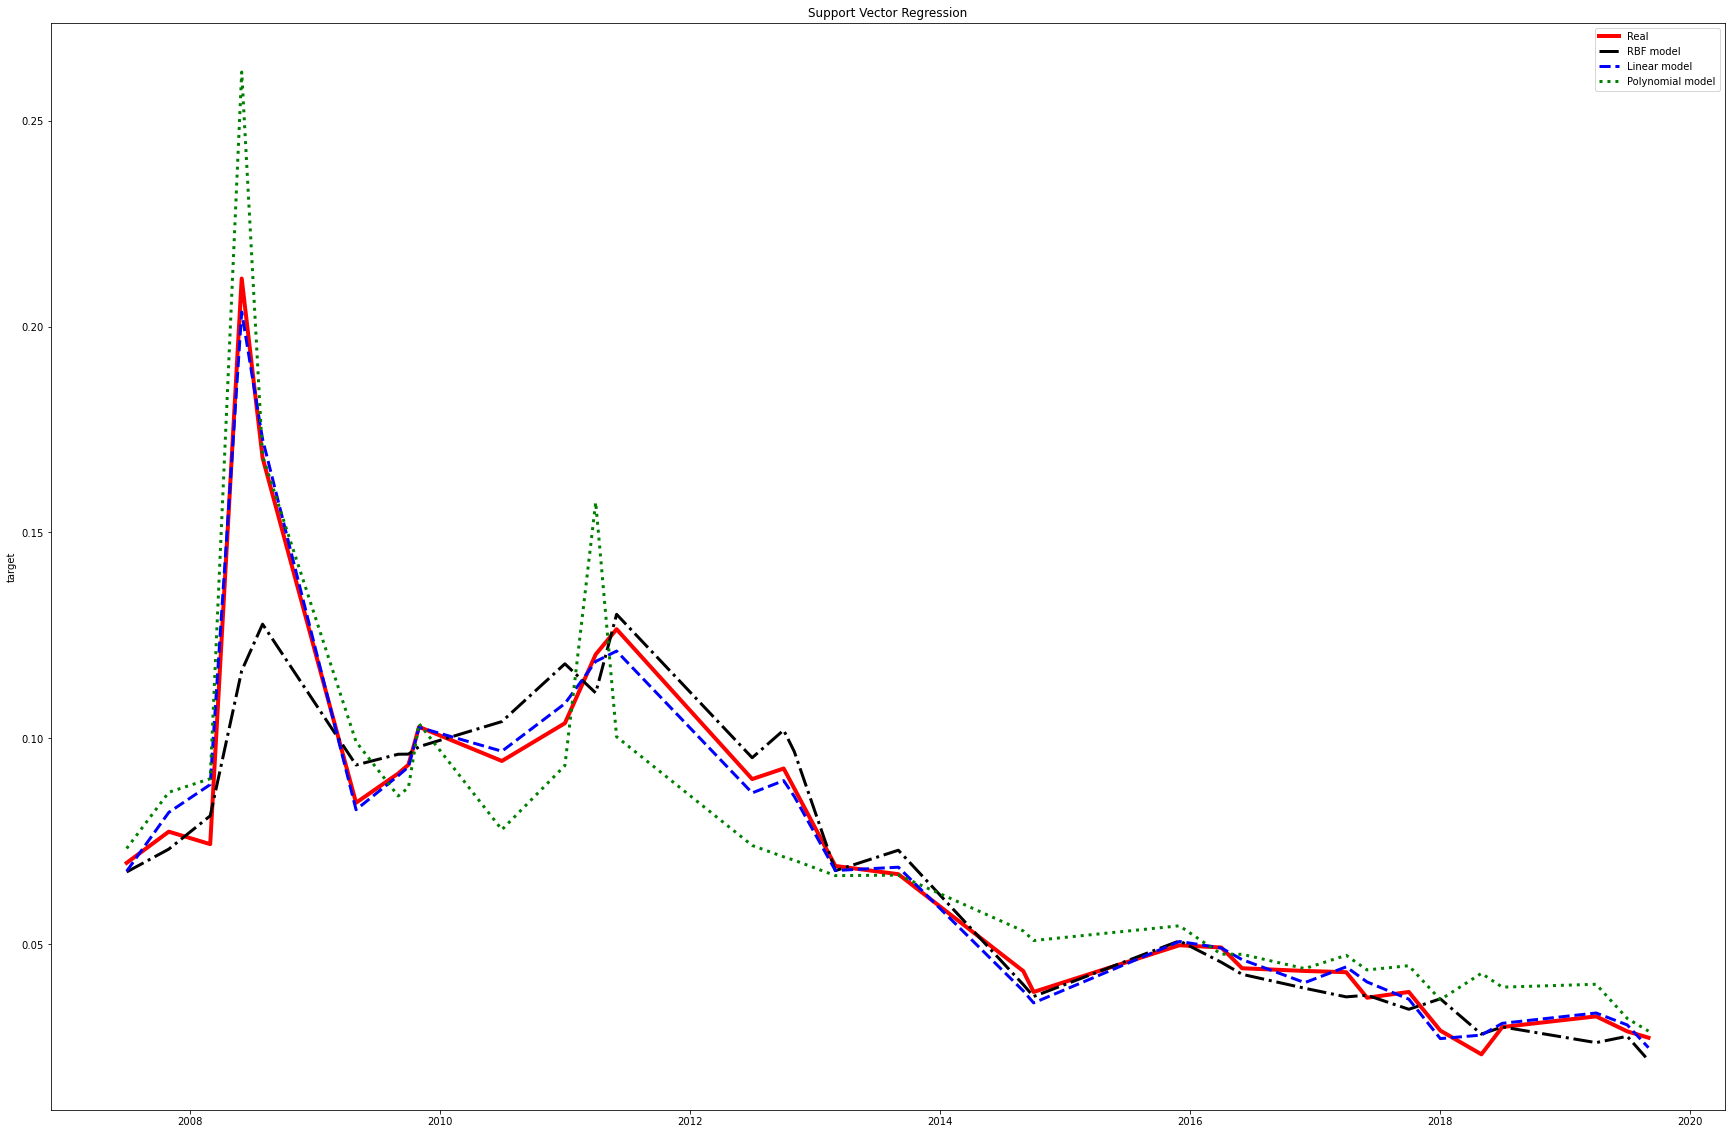

In [15]:
plt.figure(figsize=(30,20))

plt.plot(concatenate_frame.Real, color='red',label='Real',linewidth= 4)
plt.plot(concatenate_frame['RBF model'], color='black',linestyle ='-.',label='RBF model',linewidth= 3)
plt.plot(concatenate_frame['Linear model'], color='blue',linestyle ='--', label='Linear model',linewidth= 3)
plt.plot(concatenate_frame['Polynomial model'], color='g',linestyle =':', label='Polynomial model',linewidth= 3)

plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [17]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['RBF model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['RBF model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['RBF model']))*100

In [18]:
print('RBF model:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAE  = {round(mae,6)}')
print(f'MAPE = {round(mape,2)}%')


RBF model:
RMSE = 0.018908
MAE  = 0.008754
MAPE = 10.08%


In [19]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['Linear model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['Linear model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['Linear model']))*100

In [20]:
print('Linear model:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAE  = {round(mae,6)}')
print(f'MAPE = {round(mape,2)}%')


Linear model:
RMSE = 0.003933
MAE  = 0.002863
MAPE = 4.85%


In [21]:
rmse = np.sqrt(mean_squared_error(concatenate_frame.Real, concatenate_frame['Polynomial model']))
mae = mean_absolute_error(concatenate_frame.Real, concatenate_frame['Polynomial model'])
mape = (mean_absolute_percentage_error(concatenate_frame.Real, concatenate_frame['Polynomial model']))*100

In [22]:
print('Polynomial model:')
print(f'RMSE = {round(rmse,6)}')
print(f'MAE  = {round(mae,6)}')
print(f'MAPE = {round(mape,2)}%')


Polynomial model:
RMSE = 0.015193
MAE  = 0.010696
MAPE = 16.4%
